In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [206]:

df_bots = pd.read_csv("../parsed_data/bots.csv")
df_bots["bot"] = 1
df_bots

,session_id,Total_requests,Total_Bytes,Total_GET_requests,Total_POST_requests,Total_3xx_responses,Total_4xx_responses,per_image_requests,per_css_request,per_js_requests,Depth_SD,Max_requests_per_page,Average_requests_per_page,Max_sequential_request,per_sequential_requests,Session_time,Browsing_speed,SD_request_time,bot
0,97hf7ciplt2k54f5j6109nekn0,157,70114,8,149,0.0,0.0,0.0,0.006369,0.031847,0.112145,143,15.700000,157,1.0,277.0,0.036101,0.587992,1
1,46hm95bnvnuglhj1i1906nc80u,29,24199,16,13,0.0,0.0,0.0,0.137931,0.172414,0.405081,9,2.636364,29,1.0,11.0,1.000000,0.665079,1
2,mtilohhtbsshka38svllisk0am,18,17012,9,9,0.0,0.0,0.0,0.055556,0.277778,0.314270,8,1.800000,18,1.0,15.0,0.666667,0.957427,1
3,66vt430cgmgpus1k96japf46pf,326,200283,43,283,0.0,0.0,0.0,0.003067,0.015337,0.306518,264,16.300000,326,1.0,512.0,0.039062,0.813757,1
4,igirlpfg3oft6i3dl8ah549gqi,319,222003,40,279,0.0,0.0,0.0,0.003135,0.015674,0.335409,262,13.869565,319,1.0,528.0,0.043561,0.799822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,ahpte8dp0s8io8sd28orasfpkj,211,88926,18,193,0.0,0.0,0.0,0.004739,0.023697,0.137686,193,13.187500,211,1.0,189.0,0.084656,0.305605,1
420,6t1t0stce6afdl4ob3hl152fnj,306,133309,23,283,0.0,0.0,0.0,0.003268,0.016340,0.161558,283,15.300000,306,1.0,273.0,0.073260,0.330583,1
421,3d46kbg48go8hu4srfkogn5p27,384,157312,27,357,0.0,0.0,0.0,0.002604,0.013021,0.160616,357,18.285714,384,1.0,349.0,0.060172,0.305377,1
422,c4icboll633l807dsum9a4jf6f,377,152601,24,353,0.0,0.0,0.0,0.002653,0.013263,0.144799,353,19.842105,377,1.0,343.0,0.055394,0.286448,1


In [207]:
df_hum = pd.read_csv("../parsed_data/human.csv")
df_hum["bot"] = 0
df_hum

,session_id,Total_requests,Total_Bytes,Total_GET_requests,Total_POST_requests,Total_3xx_responses,Total_4xx_responses,per_image_requests,per_css_request,per_js_requests,Depth_SD,Max_requests_per_page,Average_requests_per_page,Max_sequential_request,per_sequential_requests,Session_time,Browsing_speed,SD_request_time,bot
0,g2gh9qmk9krld14h5uojlg7g10,212,132953,29,183,0.0,0.0,0.0,0.004717,0.023585,0.376059,172,12.470588,212,1.0,336.0,0.050595,0.799386,0
1,kaodsjbnqm7umgfvao63d3rihb,298,203311,36,262,0.0,0.0,0.0,0.003356,0.016779,0.322375,249,15.684211,298,1.0,484.0,0.039256,0.759517,0
2,1aqgqrcuurlmvvbbpirvsh7e53,206,128459,32,174,0.0,0.0,0.0,0.009709,0.024272,0.387651,162,12.117647,206,1.0,311.0,0.054662,0.851841,0
3,igbeqcjnbst8afmoi4sg6tn669,188,180779,39,149,0.0,0.0,0.0,0.058511,0.026596,0.299530,139,11.058824,188,1.0,269.0,0.063197,0.869400,0
4,vopb1c4o3o2dpsov8jinbbou5h,348,218947,52,296,0.0,0.0,0.0,0.045977,0.014368,0.302367,281,19.333333,348,1.0,547.0,0.032907,0.811562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,a3novvctivmjtfh19pehjqing5,63,28719,7,56,0.0,0.0,0.0,0.015873,0.079365,0.124984,56,7.875000,63,1.0,29.0,0.275862,0.558496,0
386,itltb3mfbii9h9ikttfqkc3ca2,26,19425,11,15,0.0,0.0,0.0,0.038462,0.269231,0.192308,15,2.600000,26,1.0,15.0,0.666667,0.494047,0
387,f8vvptugepi32i09gotgtjb50d,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0
388,upgqfre5gn72uks220ag27idir,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0


In [208]:
df_merged = pd.concat([df_bots, df_hum], ignore_index=True, sort=False)

In [209]:
df_merged

,session_id,Total_requests,Total_Bytes,Total_GET_requests,Total_POST_requests,Total_3xx_responses,Total_4xx_responses,per_image_requests,per_css_request,per_js_requests,Depth_SD,Max_requests_per_page,Average_requests_per_page,Max_sequential_request,per_sequential_requests,Session_time,Browsing_speed,SD_request_time,bot
0,97hf7ciplt2k54f5j6109nekn0,157,70114,8,149,0.0,0.0,0.0,0.006369,0.031847,0.112145,143,15.700000,157,1.0,277.0,0.036101,0.587992,1
1,46hm95bnvnuglhj1i1906nc80u,29,24199,16,13,0.0,0.0,0.0,0.137931,0.172414,0.405081,9,2.636364,29,1.0,11.0,1.000000,0.665079,1
2,mtilohhtbsshka38svllisk0am,18,17012,9,9,0.0,0.0,0.0,0.055556,0.277778,0.314270,8,1.800000,18,1.0,15.0,0.666667,0.957427,1
3,66vt430cgmgpus1k96japf46pf,326,200283,43,283,0.0,0.0,0.0,0.003067,0.015337,0.306518,264,16.300000,326,1.0,512.0,0.039062,0.813757,1
4,igirlpfg3oft6i3dl8ah549gqi,319,222003,40,279,0.0,0.0,0.0,0.003135,0.015674,0.335409,262,13.869565,319,1.0,528.0,0.043561,0.799822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,a3novvctivmjtfh19pehjqing5,63,28719,7,56,0.0,0.0,0.0,0.015873,0.079365,0.124984,56,7.875000,63,1.0,29.0,0.275862,0.558496,0
810,itltb3mfbii9h9ikttfqkc3ca2,26,19425,11,15,0.0,0.0,0.0,0.038462,0.269231,0.192308,15,2.600000,26,1.0,15.0,0.666667,0.494047,0
811,f8vvptugepi32i09gotgtjb50d,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0
812,upgqfre5gn72uks220ag27idir,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0


In [210]:
X = df_merged.iloc[:, 1:-1].values
Y = df_merged.iloc[:, -1].values

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [212]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



implement the class bellow


In [213]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)
class DecisionStump:
    """
    A simple decision stump: splits on 1 feature with threshold and polarity.
    Predicts labels in {-1, +1}.
    """
    def __init__(self, feature_index=None, threshold=None, polarity=1):
        self.feature_index = feature_index
        self.threshold = threshold
        self.polarity = polarity  # 1 or -1
    
    def predict(self, X):
        # X: numpy array shape (n_samples, n_features)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        f = X[:, self.feature_index]
        # polarity = 1 => predict +1 when f <= threshold else -1
        preds = np.ones(f.shape[0], dtype=int)
        if self.polarity == 1:
            preds[f > self.threshold] = -1
        else:
            preds[f <= self.threshold] = -1
        return preds


In [214]:

from sklearn.model_selection import learning_curve
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomAdaBoost(BaseEstimator, ClassifierMixin):
    """
    AdaBoost from scratch using decision stumps (1-level thresholds).
    - Works for binary classification. y can be {0,1} or {-1,1} etc.
    - Exposes plotting and reporting utilities.
    """
    def __init__(self, n_estimators=50, learning_rate=1.0, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.stumps = []        # list of DecisionStump
        self.alphas = []        # alpha for each stump
        self.feature_importances_ = None
        self.train_scores_ = [] # accuracy over iterations (training)
        self.val_scores_ = []   # optional validation scores
        if random_state is not None:
            np.random.seed(random_state)

    def _prepare_inputs(self, X, y):
        # Accept pandas DataFrame/Series or numpy arrays
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values.ravel()
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        # Convert labels to {-1, +1}
        unique = np.unique(y)
        if set(unique) <= {0, 1}:
            y_trans = np.where(y == 0, -1, 1)
        elif set(unique) <= {-1, 1}:
            y_trans = y
        else:
            # map first unique to -1, others to +1 (assumes binary)
            mapping = {unique[0]: -1, unique[1]: 1}
            y_trans = np.vectorize(mapping.get)(y)
        return X, y_trans

    def _best_stump(self, X, y, sample_weights):
        """
        Find best decision stump on X minimizing weighted classification error.
        Returns (best_stump, best_error, best_pred)
        """
        n_samples, n_features = X.shape
        best_stump = None
        best_error = float("inf")
        best_pred = None

        # For each feature, consider thresholds at midpoints of sorted unique values
        for feature_i in range(n_features):
            values = X[:, feature_i]
            sorted_idx = np.argsort(values)
            sorted_values = values[sorted_idx]
            sorted_y = y[sorted_idx]
            sorted_w = sample_weights[sorted_idx]

            # candidate thresholds: midpoints between unique consecutive values
            uniques = np.unique(sorted_values)
            if uniques.size == 1:
                thresholds = [uniques[0]]
            else:
                thresholds = (uniques[:-1] + uniques[1:]) / 2.0

            for thr in thresholds:
                for polarity in [1, -1]:
                    # Predict: +1 if (polarity == 1 and f <= thr) OR (polarity == -1 and f > thr)
                    preds = np.ones(n_samples, dtype=int)
                    if polarity == 1:
                        preds[values > thr] = -1
                    else:
                        preds[values <= thr] = -1
                    # Weighted error: sum w_i * I(pred_i != y_i)
                    mis = (preds != y).astype(float)
                    err = np.dot(sample_weights, mis)
                    if err < best_error:
                        best_error = err
                        best_stump = DecisionStump(feature_index=feature_i, threshold=thr, polarity=polarity)
                        best_pred = preds.copy()
        return best_stump, best_error, best_pred

    def fit(self, X, y, **fit_params):
        X_val = fit_params.get("X_val", None)
        y_val = fit_params.get("y_val", None)
        verbose = fit_params.get("verbose", True)
        """
        Train AdaBoost.
        X, y: training data (numpy array or pandas)
        X_val, y_val: optional validation set (used only for learning curves)
        """
        X, y = self._prepare_inputs(X, y)
        if X_val is not None and y_val is not None:
            X_val, y_val_trans = self._prepare_inputs(X_val, y_val)
            # store mapping back for evaluation if needed
        n_samples = X.shape[0]
        # initialize weights uniformly
        w = np.ones(n_samples) / n_samples

        self.stumps = []
        self.alphas = []
        self.train_scores_ = []
        self.val_scores_ = []

        for m in range(self.n_estimators):
            stump, err, pred = self._best_stump(X, y, w)

            # Avoid division by zero / degenerate stump
            eps = 1e-10
            err = max(eps, min(err, 1 - eps))

            # alpha (classifier weight)
            alpha = self.learning_rate * 0.5 * np.log((1 - err) / err)

            # update weights
            # w_i <- w_i * exp(-alpha * y_i * h_m(x_i))
            w = w * np.exp(-alpha * y * pred)
            w = w / np.sum(w)

            # store
            self.stumps.append(stump)
            self.alphas.append(alpha)

            # training score with current ensemble
            y_scores = self.decision_function(X)  # aggregated score
            y_pred = np.where(y_scores >= 0, 1, -1)
            train_acc = np.mean(y_pred == y)
            self.train_scores_.append(train_acc)

            if X_val is not None and y_val is not None:
                val_scores = self.decision_function(X_val)
                val_pred = np.where(val_scores >= 0, 1, -1)
                # convert y_val_trans back to same representation
                val_acc = np.mean(val_pred == y_val_trans)
                self.val_scores_.append(val_acc)

            # early stopping if perfect fit
            # if verbose:
                # print(f"Estimator {m+1}/{self.n_estimators}, err={err:.6f}, alpha={alpha:.6f}, train_acc={train_acc:.4f}")

            if err <= eps:
                if verbose:
                    print("Stopping early: perfect stump found.")
                break

        # compute feature importance = sum of alphas for stumps splitting on that feature
        n_features = X.shape[1]
        fi = np.zeros(n_features)
        for stump, a in zip(self.stumps, self.alphas):
            fi[stump.feature_index] += abs(a)
        # normalize
        if fi.sum() > 0:
            fi = fi / fi.sum()
        self.feature_importances_ = fi

    def decision_function(self, X):
        """
        Aggregated (signed) score: sum alpha_m * h_m(x).
        Higher -> positive class.
        """
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        X = np.asarray(X)
        n_samples = X.shape[0]
        agg = np.zeros(n_samples, dtype=float)
        for stump, alpha in zip(self.stumps, self.alphas):
            preds = stump.predict(X)  # in {-1, +1}
            agg += alpha * preds
        return agg

    def predict(self, X):
        """
        Final class labels in original scheme {0,1} if original had {0,1}, otherwise {-1,1}.
        We'll return {0,1} by default (0 for negative, 1 for positive).
        """
        scores = self.decision_function(X)
        preds_signed = np.where(scores >= 0, 1, -1)
        # convert to {0,1} for easier interoperability
        return np.where(preds_signed == -1, 0, 1)

    def predict_proba(self, X):
        """
        Return "score" that can be used for ROC: use aggregated score mapped to [0,1]
        via logistic sigmoid for convenience.
        """
        scores = self.decision_function(X)
        # sigmoid
        probs = 1 / (1 + np.exp(-2 * scores))  # steeper scaling
        # ensure shape (n_samples, 2) similar to sklearn's proba
        probs_2col = np.vstack([1 - probs, probs]).T
        return probs_2col

    def evaluate(self, y_true, y_pred):
        """
        Print accuracy, precision, recall, f1 and classification report.
        Accepts y_true and y_pred as 0/1 or pandas series.
        """
        if isinstance(y_true, (pd.Series, pd.DataFrame)):
            y_true = y_true.values.ravel()
        if isinstance(y_pred, (pd.Series, pd.DataFrame)):
            y_pred = y_pred.values.ravel()
        acc = accuracy_score(y_true, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
        if(f1>0.86):
            print("*********")
        print("====== Evaluation ======")
        print(f"Accuracy : {acc:.6f}")
        print(f"Precision: {prec:.6f}")
        print(f"Recall   : {rec:.6f}")
        print(f"F1-score : {f1:.6f}")
        print("\nClassification Report:\n")
        print(classification_report(y_true, y_pred, zero_division=0))
        return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

    def plot_confusion_matrix(self, y_true, y_pred, labels=[0, 1], cmap='Blues'):
        """Plot confusion matrix using sklearn's built-in display."""
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=cmap, colorbar=True)
        plt.title("Confusion Matrix ")
        plt.show()

    def plot_roc_pr(self, y_true, X_scores=None):
        """Plot ROC and Precision-Recall curves using sklearn’s built-in functions."""
        if X_scores is None:
            raise ValueError("Provide either X (features) to compute scores or pass precomputed scores.")
        if isinstance(X_scores, (pd.DataFrame, pd.Series)) or (
            isinstance(X_scores, np.ndarray) and X_scores.ndim == 2
        ):
            y_score = self.decision_function(X_scores)
        else:
            y_score = np.asarray(X_scores).ravel()

        # ROC Curve
        RocCurveDisplay.from_predictions(y_true, y_score)
        plt.title("ROC Curve ")
        plt.grid(True)
        plt.show()

        # Precision-Recall Curve
        PrecisionRecallDisplay.from_predictions(y_true, y_score)
        plt.title("Precision-Recall Curve ")
        plt.grid(True)
        plt.show()

    def plot_feature_importance(self, feature_names=None, top_n=None):
        """Use built-in bar plot for feature importances (still manual, sklearn doesn't have one for AdaBoost)."""
        fi = self.feature_importances_
        if fi is None:
            raise RuntimeError("Feature importances not computed. Call fit() first.")
        n_features = fi.shape[0]
        if feature_names is None:
            feature_names = [f"Feature {i}" for i in range(n_features)]
        idx = np.argsort(fi)[::-1]
        if top_n:
            idx = idx[:top_n]

        plt.barh(range(len(idx)), fi[idx])
        plt.yticks(range(len(idx)), [feature_names[i] for i in idx])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Feature Importances (AdaBoost)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    def plot_learning_curve_custom(self, X, y, train_sizes=None, test_size=0.2, random_state=42):
        """
        Custom learning curve plot that does not rely on sklearn.learning_curve.
        Works even if the estimator has custom fit() parameters.
        """
        if train_sizes is None:
            train_sizes = np.linspace(0.1, 1.0, 5)

        X = np.array(X)
        y = np.array(y)

        train_scores = []
        test_scores = []

        for frac in train_sizes:
            # Split data manually
            X_train_part, X_val_part, y_train_part, y_val_part = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )

            n_train = int(len(X_train_part) * frac)
            X_sub, y_sub = X_train_part[:n_train], y_train_part[:n_train]

            # Fit model (use the same signature your model expects)
            self.fit(X_sub, y_sub, verbose=False)

            # Compute scores
            y_train_pred = self.predict(X_sub)
            y_val_pred = self.predict(X_val_part)

            train_acc = accuracy_score(y_sub, y_train_pred)
            val_acc = accuracy_score(y_val_part, y_val_pred)

            train_scores.append(train_acc)
            test_scores.append(val_acc)

        # --- Plot ---
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_scores, "o-", label="Training Accuracy")
        plt.plot(train_sizes, test_scores, "o-", label="Validation Accuracy")
        plt.xlabel("Fraction of Training Data Used")
        plt.ylabel("Accuracy")
        plt.title("Custom Learning Curve")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def score(self, X, y):
        """Return accuracy score (required for sklearn compatibility)."""
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

    def full_report(self, X_train, y_train, X_test, y_test, show_plots=True):
        """
        Evaluate model on test set and print metrics + show plots.
        """
        y_pred = self.predict(X_test)
        self.evaluate(y_test, y_pred)
        if show_plots:
            self.plot_confusion_matrix(y_test, y_pred)
            # ROC/PR - pass features to compute scores
            self.plot_roc_pr(y_test, X_scores=X_test)
            self.plot_feature_importance()
        return y_pred

['Total_requests', 'Total_Bytes', 'Total_GET_requests', 'Total_POST_requests', 'Total_3xx_responses', 'Total_4xx_responses', 'per_image_requests', 'per_css_request', 'per_js_requests', 'Depth_SD', 'Max_requests_per_page', 'Average_requests_per_page', 'Max_sequential_request', 'per_sequential_requests', 'Session_time', 'Browsing_speed', 'SD_request_time', 'bot']
250 0.25
*********
====== Evaluation ======
Accuracy : 0.883436
Precision: 0.873418
Recall   : 0.884615
F1-score : 0.878981

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        85
           1       0.87      0.88      0.88        78

    accuracy                           0.88       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.88      0.88      0.88       163



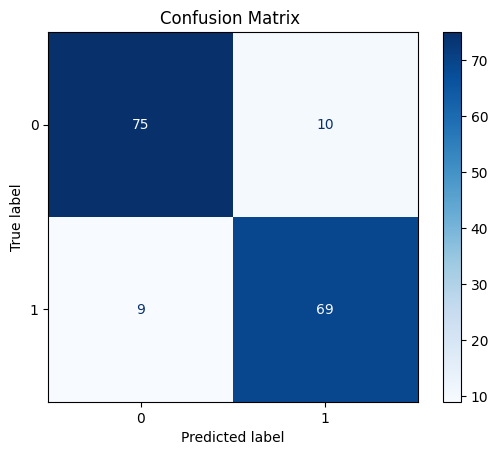

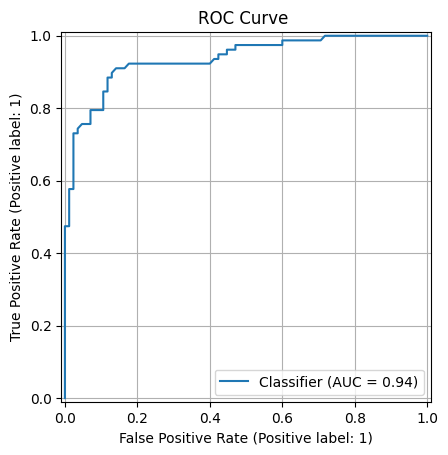

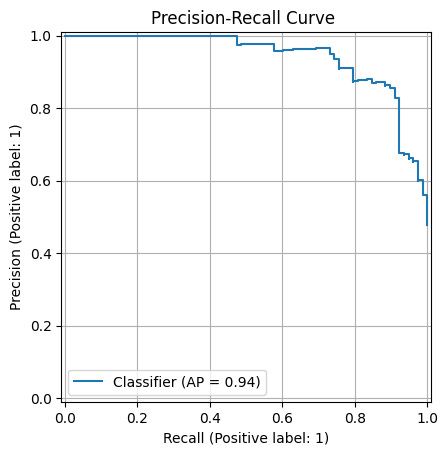

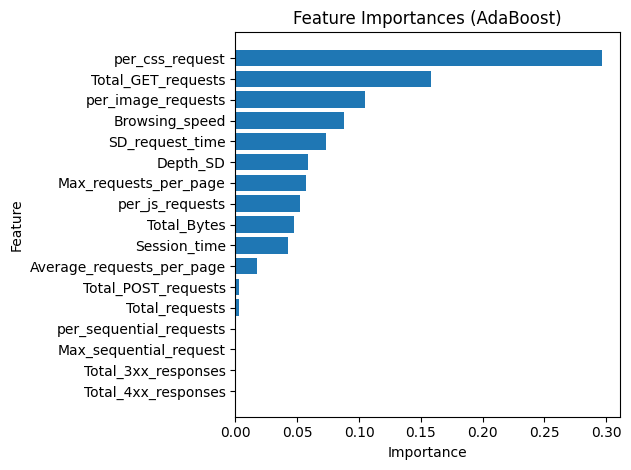

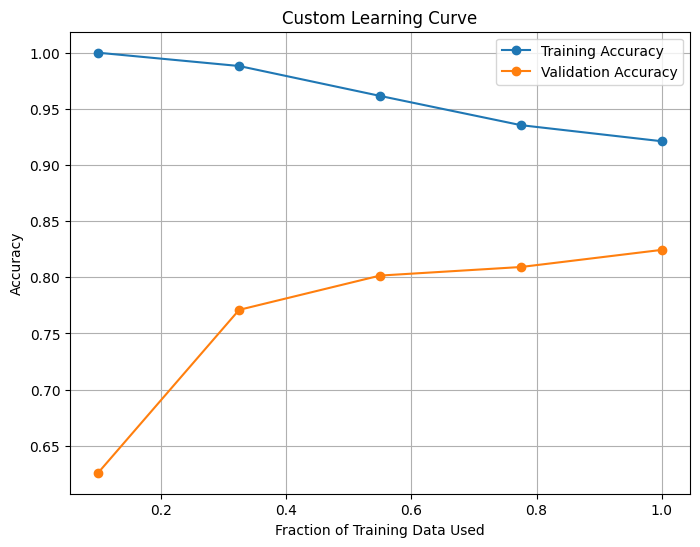

In [215]:
# assume X_train, y_train, X_test, y_test are already prepared (numpy arrays or pandas)
list_of_feature_names = df_hum.columns[1:].tolist()
# print(list_of_feature_names)

# best f1-score for pairs {n-estimators,learning_rate} = [{175,0.5}, {250,0.25}] -> bots.csv & humans.csv 
# best f1-score for pair {n-estimators,learning_rate} = [{100,0.25}] -> bots.csv & humans.csv 

n_estimators = [250]
learning_rates = [0.25]

for n_estimator,learning_Rate in zip(n_estimators,learning_rates):
    # print(n_estimator,learning_Rate)
    model=CustomAdaBoost(n_estimators=n_estimator,learning_rate=learning_Rate,random_state=42)

    # optional: pass a validation split to get validation learning curve points
    model.fit(X_train, y_train, X_val=X_test, y_val=y_test, verbose=True)

    # predictions
    y_pred = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]  # probability of positive

    # evaluation printed
    model.evaluate(y_test, y_pred)

    # plots (printed inline)
    model.plot_confusion_matrix(y_test, y_pred)
    y_scores = model.decision_function(X_test)
    model.plot_roc_pr(y_test, X_scores=y_scores)
    model.plot_feature_importance(feature_names=list_of_feature_names)
    model.plot_learning_curve_custom(X_train, y_train)

